In [1]:
import numpy as np
import scipy
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import kernel_pca as kpca # python file of own implementation of kernel PCA

# Own implementation

Text(0.5, 1.0, 'data')

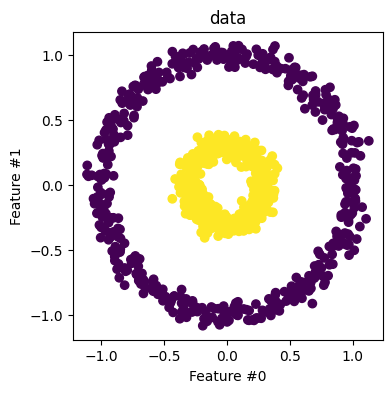

In [3]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
_, ax = plt.subplots(ncols=1, sharex=True, sharey=True, figsize=(4, 4))

ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set_ylabel("Feature #1")
ax.set_xlabel("Feature #0")
ax.set_title("data")

In [4]:
X_kernel_pca, eigenvectors, eigenvalues = kpca.kernel_PCA(X, n_components=None, kernel='rbf', gamma=10)

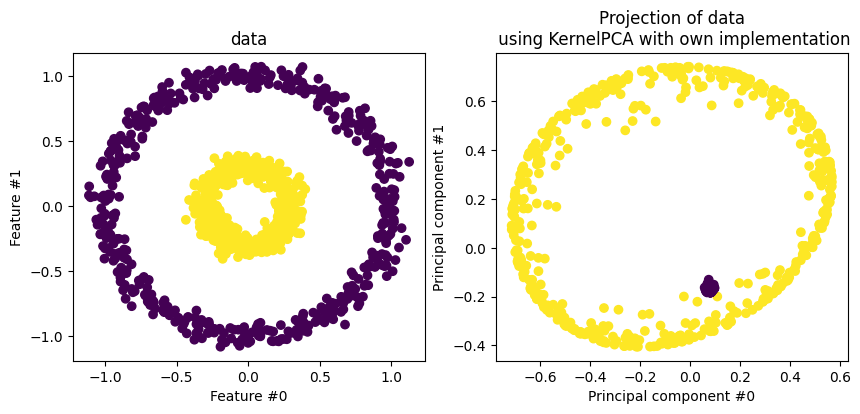

In [5]:
fig, (orig_data_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(10, 4)
)

orig_data_ax.scatter(X[:, 0], X[:, 1], c=y)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("data")

kernel_pca_proj_ax.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of data\n using KernelPCA with own implementation")

# Compare to the results taken from sklearn example
https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py

In [6]:
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, eigen_solver='dense'
)
X_kernel_pca_sklearn = kernel_pca.fit(X).transform(X)

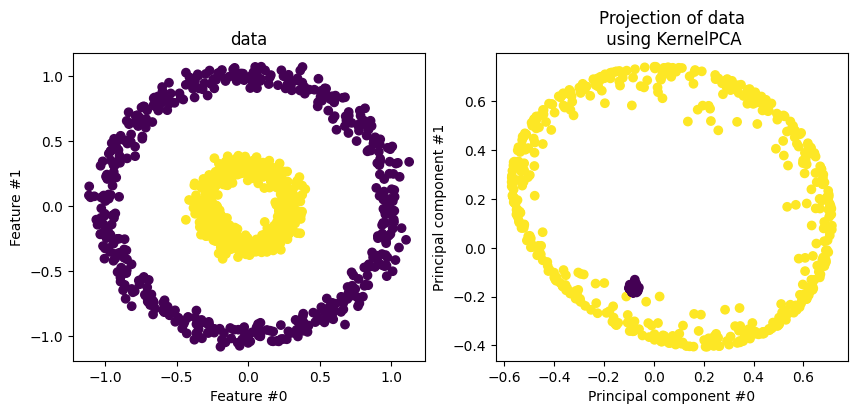

In [7]:
fig, (orig_data_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(10, 4)
)

orig_data_ax.scatter(X[:, 0], X[:, 1], c=y)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("data")

kernel_pca_proj_ax.scatter(X_kernel_pca_sklearn[:, 0], X_kernel_pca_sklearn[:, 1], c=y)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of data\n using KernelPCA")

Note that we get the same magnitude in each PC's for both our own implementation and sklearn example, but sometimes the signs are flipped as you can see from the two plots. Each PC is an eigenvector of K, the sign being flipped does not make a difference. Below we visualize the PC's (eigenvectors) of our own implementation vs sklearn.

In [8]:
print(f"Own implementation\n{eigenvectors}")
print(f"sklearn\n{kernel_pca.eigenvectors_}")

Own implementation
[[-0.04874267  0.05159269  0.01251619 ...  0.          0.
   0.        ]
 [-0.05024189 -0.02272287 -0.04860843 ... -0.00615905  0.00162926
  -0.00062835]
 [ 0.00814747 -0.01736404  0.02535501 ... -0.00335556 -0.00096022
   0.00172684]
 ...
 [ 0.03208536  0.05881071 -0.02289995 ... -0.02185215 -0.00587783
  -0.00156721]
 [-0.01418666  0.06905899  0.012249   ... -0.00455318 -0.00428381
   0.01390451]
 [ 0.05492013  0.01817501 -0.04563389 ... -0.02463856  0.04000384
   0.03402352]]
sklearn
[[ 0.04874267  0.05159269 -0.01251619 ...  0.02005458  0.00734378
  -0.00983051]
 [ 0.05024189 -0.02272287  0.04860843 ... -0.01684901  0.03573878
   0.00944137]
 [-0.00814747 -0.01736404 -0.02535501 ...  0.03989109 -0.02427766
   0.04354373]
 ...
 [-0.03208536  0.05881071  0.02289995 ... -0.04893983  0.01411499
   0.00776415]
 [ 0.01418666  0.06905899 -0.012249   ...  0.026998    0.03854865
   0.01949737]
 [-0.05492013  0.01817501  0.04563389 ... -0.01555076 -0.00944156
   0.00096846